In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
table = pd.read_excel(r'C:\Users\HP\OneDrive\Documents\machine\Armenian Market Car Prices.xlsx')
table

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500
...,...,...,...,...,...,...
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500


In [3]:
table['FuelType']

0         Diesel
1       Gasoline
2       Gasoline
3       Gasoline
4       Gasoline
          ...   
7990    Gasoline
7991    Gasoline
7992    Gasoline
7993    Gasoline
7994    Gasoline
Name: FuelType, Length: 7995, dtype: object

In [4]:
table_fueltype_replace = table['FuelType'].replace(['Gasoline', 'Diesel'],[1000, 2000])
#table_fueltype_replace = table['FuelType'].replace('Diesel', 2000)
table_fueltype_replace

0       2000
1       1000
2       1000
3       1000
4       1000
        ... 
7990    1000
7991    1000
7992    1000
7993    1000
7994    1000
Name: FuelType, Length: 7995, dtype: object

In [5]:
table

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500
...,...,...,...,...,...,...
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500


In [6]:
table_no = table[['Year','Mileage','Price']]
table_no

,Year,Mileage,Price
0,2002,215000,12000
1,2017,72000,11500
2,1998,466000,4000
3,2020,100000,22000
4,1998,318000,3500
...,...,...,...
7990,2013,150000,35000
7991,2018,94000,5600
7992,2001,151000,9800
7993,2009,300000,4500


In [7]:
table_no.corr()['Price']

Year       0.134358
Mileage   -0.106657
Price      1.000000
Name: Price, dtype: float64

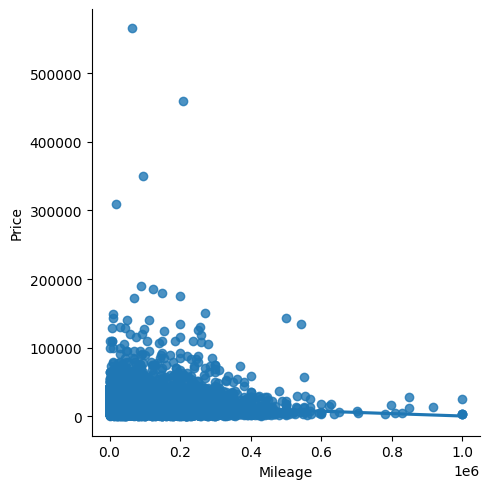

In [8]:
sns.lmplot(x='Mileage', y='Price', data = table, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

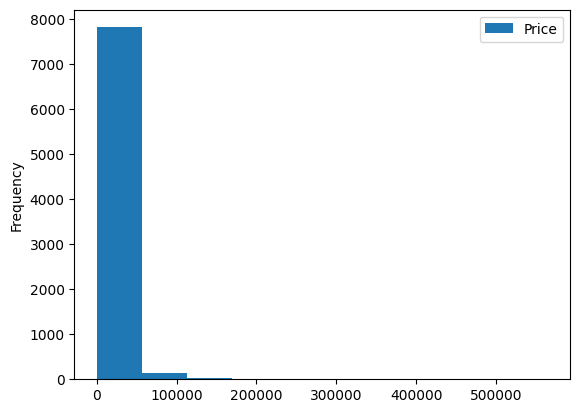

In [9]:
table.plot.hist(y='Price')

In [10]:
_max = table['Year'].max()

In [11]:
_min = table['Year'].min()

In [12]:
year_diff = _max - _min
year_diff

np.int64(81)

In [13]:
_min

np.int64(1943)

In [14]:
_max

np.int64(2024)

In [15]:
train = table[table['Year']<2020].copy()
test = table[table['Year']>=2020].copy()

In [16]:
train.shape

(6782, 6)

In [17]:
test.shape

(1213, 6)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
predictors = ['Mileage']

In [21]:
target = 'Price'

In [22]:
reg.fit(train[predictors], train['Price'])

LinearRegression()

In [23]:
predictions = reg.predict(test[predictors])

In [24]:
test

,Car Name,Year,Region,FuelType,Mileage,Price
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
24,Mazda CX-5,2020,Erebuni,Gasoline,48000,26200
33,Toyota Camry,2020,Avan,Gasoline,98000,22500
42,Infiniti QX80,2021,Shengavit,Gasoline,94000,45000
50,Toyota Land Cruiser,2020,Kentron,Gasoline,30000,130000
...,...,...,...,...,...,...
7948,Kia Optima,2020,Artashat,Gasoline,84000,18250
7958,Rolls-Royce Cullinan,2020,Davtashen,Gasoline,19150,310000
7959,Mercedes-Benz G-Class AMG,2023,Davtashen,Gasoline,3500,3800
7974,Mazda CX-5,2020,Nork-Marash,Gasoline,35000,14500


In [25]:
test['predictions'] = predictions

In [26]:
test

,Car Name,Year,Region,FuelType,Mileage,Price,predictions
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,15211.112556
24,Mazda CX-5,2020,Erebuni,Gasoline,48000,26200,15661.154089
33,Toyota Camry,2020,Avan,Gasoline,98000,22500,15228.421845
42,Infiniti QX80,2021,Shengavit,Gasoline,94000,45000,15263.040425
50,Toyota Land Cruiser,2020,Kentron,Gasoline,30000,130000,15816.937697
...,...,...,...,...,...,...,...
7948,Kia Optima,2020,Artashat,Gasoline,84000,18250,15349.586873
7958,Rolls-Royce Cullinan,2020,Davtashen,Gasoline,19150,310000,15910.840593
7959,Mercedes-Benz G-Class AMG,2023,Davtashen,Gasoline,3500,3800,16046.285786
7974,Mazda CX-5,2020,Nork-Marash,Gasoline,35000,14500,15773.664472


In [27]:
test['predictions'] = test['predictions'].round()

In [28]:
test

,Car Name,Year,Region,FuelType,Mileage,Price,predictions
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,15211.0
24,Mazda CX-5,2020,Erebuni,Gasoline,48000,26200,15661.0
33,Toyota Camry,2020,Avan,Gasoline,98000,22500,15228.0
42,Infiniti QX80,2021,Shengavit,Gasoline,94000,45000,15263.0
50,Toyota Land Cruiser,2020,Kentron,Gasoline,30000,130000,15817.0
...,...,...,...,...,...,...,...
7948,Kia Optima,2020,Artashat,Gasoline,84000,18250,15350.0
7958,Rolls-Royce Cullinan,2020,Davtashen,Gasoline,19150,310000,15911.0
7959,Mercedes-Benz G-Class AMG,2023,Davtashen,Gasoline,3500,3800,16046.0
7974,Mazda CX-5,2020,Nork-Marash,Gasoline,35000,14500,15774.0


In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
error =  mean_absolute_error(test['Price'], test['predictions'])
error

np.float64(12319.726298433636)

In [33]:
table.describe()['Price']

count      7995.000000
mean      15555.002877
std       17731.598604
min         200.000000
25%        6000.000000
50%       11500.000000
75%       19000.000000
max      565000.000000
Name: Price, dtype: float64

In [35]:
test[test['FuelType'] == 'Diesel'].head(3)

,Car Name,Year,Region,FuelType,Mileage,Price,predictions
2001,Peugeot Expert,2023,Arabkir,Diesel,35,4500,16076.0
3418,Mercedes-Benz Sprinter,2020,Nor Nork,Diesel,11173,143000,15980.0
4866,Toyota Hilux pickup,2021,Kentron,Diesel,30000,4400,15817.0


In [36]:
errors = (test['Price'] - test['predictions']).abs()

In [37]:
errors

3         6789.0
24       10539.0
33        7272.0
42       29737.0
50      114183.0
          ...   
7948      2900.0
7958    294089.0
7959     12246.0
7974      1274.0
7976      2470.0
Length: 1213, dtype: float64

In [38]:
error_by_team = errors.groupby(test['Car Name']).mean()

In [39]:
error_by_team 

Car Name
AIQAR eQ3             10624.00
Acura ILX              8210.00
Acura RDX              6679.00
Alfa Romeo Stelvio     9036.00
Audi E-tron            6092.00
                        ...   
Volkswagen Tiguan     11296.75
Volkswagen e-Bora     75174.00
Wuling Sunshine       12424.00
Zeekr 001             12176.00
Zeekr X               18924.00
Length: 240, dtype: float64

In [40]:
Price_by_team = test['Price'].groupby(test['Car Name']).mean()

In [41]:
Price_by_team

Car Name
AIQAR eQ3             26700.0
Acura ILX              7540.0
Acura RDX             22500.0
Alfa Romeo Stelvio    25000.0
Audi E-tron           22000.0
                       ...   
Volkswagen Tiguan     21825.0
Volkswagen e-Bora     91000.0
Wuling Sunshine       28500.0
Zeekr 001              3900.0
Zeekr X               35000.0
Name: Price, Length: 240, dtype: float64

In [42]:
error_ratio = error_by_team / Price_by_team

In [43]:
error_ratio

Car Name
AIQAR eQ3             0.397903
Acura ILX             1.088859
Acura RDX             0.296844
Alfa Romeo Stelvio    0.361440
Audi E-tron           0.276909
                        ...   
Volkswagen Tiguan     0.517606
Volkswagen e-Bora     0.826088
Wuling Sunshine       0.435930
Zeekr 001             3.122051
Zeekr X               0.540686
Length: 240, dtype: float64

<Axes: ylabel='Frequency'>

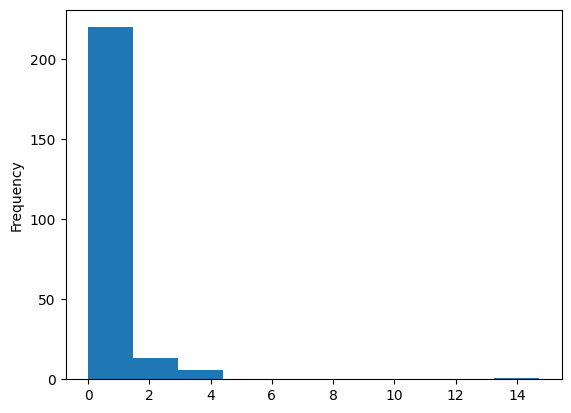

In [44]:
error_ratio.plot.hist()

In [45]:
error_ratio.sort_values()

Car Name
Chery Tiggo 7 Pro             0.001563
BYD Seagull hatchback         0.025697
Cadillac CT5                  0.032000
Porsche Taycan                0.062533
BMW X3 M                      0.079257
                               ...    
Audi Q5                       3.355000
Maserati Levante              3.360000
Volkswagen Polo               3.837188
Tesla Model X                 3.988750
Chevrolet Colorado pickup    14.730000
Length: 240, dtype: float64